# 1.- Introduction to Decision Trees

In [1]:
import numpy as np
import pandas as pd

Our first toy example to understand what supervised learning is. In this dataset, we have the first two columns specifying the color of an object and its weight, and the third column is the kind of fruit it is:

In [2]:
training_data = [[150, 'Bumpy', 'Orange'],
                [170, 'Bumpy', 'Orange'],
                [140, 'Smooth', 'Apple'],
                [130, 'Smooth', 'Apple']]
training_data

[[150, 'Bumpy', 'Orange'],
 [170, 'Bumpy', 'Orange'],
 [140, 'Smooth', 'Apple'],
 [130, 'Smooth', 'Apple']]

Our goal is to write a program that can take a description of an object in terms of its color and weight and return a prediction of whether that object is an apple, a grape, or a lemon. We call the attributes that describe the object **features** and the kind of object it is the **targets** (or labels).

Let us make that explicit:

In [3]:
features = [[150, 'Bumpy'],
            [170, 'Bumpy'],
            [140, 'Smooth'],
            [130, 'Smooth']]
targets = ['Orange','Orange','Apple','Apple']

We are going to see a fist example on how to use a very popular machine learning library called `scikit-learn` to solve this problem. Now, `scikit-learn` wants numerical values to work with, not strings. We just replace them:

In [4]:
features = [[150,0], [170,0], [140,1], [130,1]]
targets = [0,0,1,1]

We will be training a decision tree from `scikit-learn` on the above data just to have a first impression of how this library work. Later on we will be implementing one by ourselves, and finally we will train a scikit-learn decision tree on a larger dataset. For now, we would like to have a set of rules like the following:

![title](im1.png)

That allow us to classify any new fruit that comes to us by simply measuring its weight and texture. For that, we simply 

In [5]:
from sklearn import tree

Our classifier is going to be performing classification (and not regression), so we want to instantiate the following object:

In [6]:
classifier = tree.DecisionTreeClassifier()

At the moment, this is like an empty box of rules, and we need to fill those rules with useful information. 
The process by which we find out what are the optimal rules to classify our data based on the labels it has is called learning. This means that we extract our rules by finding hidden patterns in the data. For example, if oranges tend to weight more than apples, we could come up with a rule like the one in the above diagram.

In scikit-learn, the classifier object comes with training algorithms implemented, typically in a method called `fit()`. Such method will require as input the training data and the labels in order to learn how to build the optimal rules, and it will return an object of the same type but that has some rules built on it:

In [7]:
trained_classifier = classifier.fit(features, targets)

How do we now use our trained classifier to make new predictions? Given a new fruit we would extract its features and pass them to the classifer by means of its method `predict()`:

In [8]:
new_fruits = [[150,0]] # a bumpy fruit that weighs 150g
trained_classifier.predict(new_fruits)

array([0])

Recall we encoded the targets as 0->Orange, 1->Apple. This means that our classifier thinks that a heavy, bumpy fruit is most likely an orange, which is consistent with our data.

Let us see a more interesting example. We will now be working with the very famous Iris dataset, have a look here:
    
https://en.wikipedia.org/wiki/Iris_flower_data_set

As you can see, we have a set of flowers, each of them described by four features: petal length/width and sepal length/width. The targets correspond to three different categories: setosa, versicolor, and virginica.

Conveniently, scikit-learn already comes with this dataset pre-packaged, as well as other datasets and utilities to load them easily. You can have a look here:

https://scikit-learn.org/stable/datasets/index.html

Let us load the iris dataset:

In [9]:
from sklearn.datasets import load_iris

dataset = load_iris()

Inside the `dataset` object we have the features and the targets, called targets. Their names can be accessed like this:

In [10]:
dataset.feature_names, dataset.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

The values themselves are contained in the `data` attribute:

In [11]:
features = dataset.data
targets = dataset.target

This are now standard numpy arrays, and you can check their shape to find out how many examples you have:

In [12]:
print(type(features), features.shape)
print(type(targets), targets.shape)

<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)


* **Exercise**: Find out the values of sepal length/width and petal length/width of the **fourth example**, as well as its category:

In [13]:
## YOUR CODE HERE


Before training a classifier in this dataset, let us recall that in machine learning we always need to have a training set and an independent held-out test set. The training set is used to teach our algorithms, and the test set to understand how good they are **after the training has finished**.

This is easily accomplished with the `train_test_split` function of scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.10)

In [16]:
print(targets.shape, targets_train.shape, targets_test.shape)

(150,) (135,) (15,)


* **Exercise**: Just as before, instantiate and train a decision tree classifier on the training data

In [17]:
## YOUR CODE HERE
# clf = 
# trained_clf = 

Once our classifier has been trained, we can use it on an example from the test set and compare the prediction with the actual target:

In [19]:
trained_clf.predict([features_test[0,:]])

array([2])

In [20]:
targets_test[0]

2

We can also visualize the decision tree we just trained as in the following cell. Note that at the top of each blob there is the question you need to answer to proceed to the next level.

(Note: you  might need to install `graphviz`: `conda install python-graphviz`)
(Also: `conda install -c conda-forge pydotplus`

In [21]:
dot_data = tree.export_graphviz(trained_clf, out_file=None, 
                               feature_names=dataset.feature_names,  
                               class_names=dataset.target_names,  
                               filled=True, rounded=True,  
                               special_characters=True)  

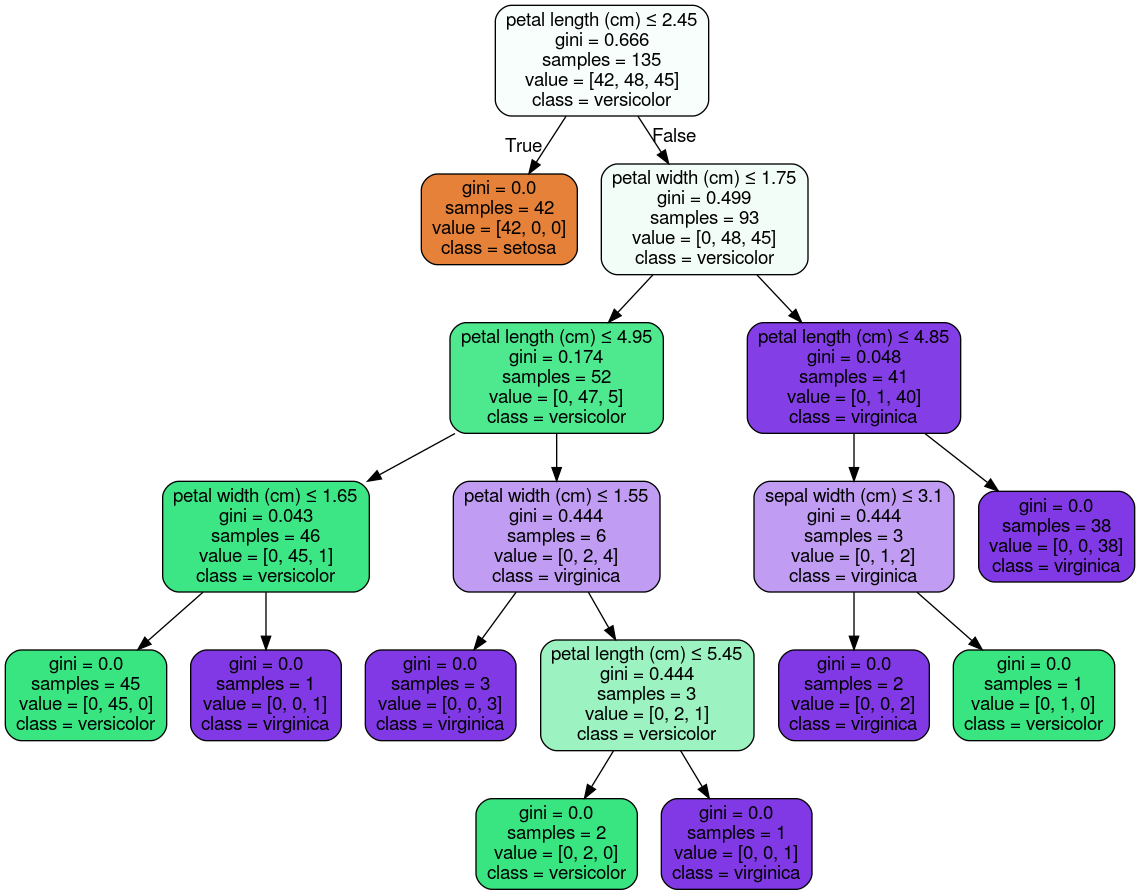

In [22]:
from IPython.display import Image  
import pydotplus

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Note that there is a `gini` attribute on each box. We will explain that afterwards.

Let us traverse the decision tree for the second example in the test set to see how the tree got to its answer:

In [23]:
for x in zip(dataset.feature_names, features_test[1,:]):
    print(x)
dataset.target_names[targets_test[1]]

('sepal length (cm)', 6.0)
('sepal width (cm)', 2.9)
('petal length (cm)', 4.5)
('petal width (cm)', 1.5)


'versicolor'

We can also build a bunch of predictions all at once by passing to the `predict` method of the classifier the entire test set, for example:

In [24]:
preds_test = trained_clf.predict(features_test)

In order to see how accurate our tree is, we can check its accuracy in the training set using the `.score()` method available in the tree itself:

In [25]:
trained_clf.score(features_train, targets_train)

1.0

In [26]:
trained_clf.score(features_test, targets_test)

1.0

Or we can first create the predictions and then use the `accuracy_score` function:

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
preds_train = trained_clf.predict(features_train) 
preds_test = trained_clf.predict(features_test)

In [29]:
accuracy_score(preds_train, targets_train)

1.0

In [30]:
accuracy_score(preds_test, targets_test)

1.0

As you can see, the performance in the test set is lower than in the train set. This is called overfitting, and we will see more on this and how to obtain more reliable (not overoptimistic) performance estimates by the end of the lab.

# 2. Implementing a Decision Tree from Scratch
In this part of the lecture we are going to build from scratch a decision tree similar to the one in scikit-learn. This should allow us to understand better what is going on behind the curtains, and we will also take the opportunity to review your understanding of the **Gini impurity index** and **information gain**.

We are going to use a very simple dataset containing the color of a fruit and its weight as features, and the label will be the name of the fruit (what we want to predict). As such, the format will be:

* Each row is an example.
* The last column is the target.
* The first two columns are features.

With this, let us see the data:

In [31]:
# Column target, we will use these only to print the tree.
header = ["color", "diameter", "target"]

training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

Note that the 2nd and 5th examples have the same features, but different labels - we will see how the tree handles this case.

Let us also define some data for testing purposes now, although we will use this only in the end!

In [32]:
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

We will be using an algorithm known as CART, which stands for Classification and Regression Trees. 

**(Head to page 1 of the slides to start a summary of how this works)**

Back to the code.

We are going to write here a set of small helper functions that are quite self-explanatory:

In [33]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [34]:
# example:
unique_vals(training_data, 0), unique_vals(training_data, 1)

({'Green', 'Red', 'Yellow'}, {1, 3})

In [35]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts
# example:
class_counts(training_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}

In [36]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)
# example:
is_numeric(7), is_numeric("Red")

(True, False)

### How to create a question for a dataset:

And this is the class `Question` from the slides:

In [37]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

`Question` allows us to partition the training data regarding the answer of a particular question:

In [38]:
# Example
q = Question(column=0, value='Green')
# Let's pick an example from the training set...
example = training_data[0]
# ... and see if it matches the question
example, q.match(example) # this will be true, since the first example is Green.

(['Green', 3, 'Apple'], True)

In [39]:
# Example
q = Question(column=1, value=2)
# Let's pick an example from the training set...
example = training_data[2]
# ... and see if it matches the question
example, q.match(example) # this will be false, since the thrid example has a diameter of 1 which is less than 2

(['Red', 1, 'Grape'], False)

### How to partition a dataset based on a question:

In [40]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

`partition` allows us to pass a subset of the training data (we can use the entire training set) and a question:

In [41]:
# Let's partition the training data based on whether rows are Red.
true_rows, false_rows = partition(training_data, Question(0, 'Red'))

We get back two subsets, the subset where the question is true:

In [42]:
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

and the subset where the question is false:

In [43]:
false_rows # This will contain everything else.

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

### How to compute the Gini index:

In [44]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

Let's see how Gini works. For a completely pure dataset, we should be getting the lowest Gini index possible:

In [45]:
# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
              ['Apple']]
# this will return 0
gini(no_mixing)

0.0

For a dataset with some mixed objects, we should see an intermmediate value:

In [46]:
some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
gini(some_mixing)

0.5

For a dataset with lots of different objects, we should obtain a large Gini index:

In [47]:
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
gini(lots_of_mixing)

0.7999999999999998

### How to compute the InfoGain score:

We need to provide a parent node and two child nodes, and then we compute the Gini index of the parent minus a weighted average of the Gini indexes of the children:

In [48]:
def info_gain(left, right, current_gini):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_gini - p * gini(left) - (1 - p) * gini(right)

Let us calculate the gini index on the entire training data:

In [49]:
current_gini = gini(training_data)
current_gini

0.6399999999999999

How much information do we gain by partioning on `Green`?

In [50]:
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
info_gain(true_rows, false_rows, current_gini)

0.1399999999999999

What about if we partioned on `Red` instead?

In [51]:
true_rows, false_rows = partition(training_data, Question(0,'Red'))
info_gain(true_rows, false_rows, current_gini)

0.37333333333333324

We conclude that we will learn more information using `Red` (0.37) than `Green` (0.14).
Why? Look at the different splits that result, and see which one  looks more "unmixed" to you:

In [52]:
true_rows, false_rows = partition(training_data, Question(0,'Red'))
# Here, the true_rows contain only 'Grapes'.
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

And the false rows contain two types of fruit. Not too bad.

In [53]:
false_rows

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

On the other hand, partitioning by Green doesn't help so much. We manage to isolate one apple in the true rows:

In [54]:
true_rows, false_rows = partition(training_data, Question(0,'Green'))
true_rows

[['Green', 3, 'Apple']]

But, the false-rows are too mixed up:

In [55]:
false_rows

[['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

## Finding the best split
Now we can build a function to find the best split in terms of InfoGain. We proceed as follows:
1. Iterate over every feature (first `for` loop below)
2. Iterate for every possible value of that feature (second `for` loop below)
3. For that feature/value combination, generate a question 
4. For that question, partition the dataset.
5. Discard any question that fails to produce a split (the inner `if` condition)
6. Compute InfoGain for this split
7. Keep track of the best value, return best question in the end

Let's see this in action:

In [56]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

Find the best question to ask first for our toy dataset

In [57]:
best_gain, best_question = find_best_split(training_data)
best_question

Is diameter >= 3?

The `Leaf` and `Decision_Node` classes below are used by `build_tree`:

In [58]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [59]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

`build_tree` will create a decision tree out of our training data:

In [60]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


And this is a pretty printing of the resulting tree:

In [61]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [62]:
my_tree = build_tree(training_data)

In [63]:
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


Below we have a convenience function that we can use to classify a single example give a tree:

In [64]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

We see that our tree predicts the 1st row of our training data is an apple with confidence 1.

In [65]:
classify(training_data[0], my_tree)

{'Apple': 1}

In [66]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [67]:
# Printing that a bit nicer
print_leaf(classify(training_data[0], my_tree))

{'Apple': '100%'}

However, on the second example, the confidence is lower

In [68]:
print_leaf(classify(training_data[1], my_tree))

{'Apple': '50%', 'Lemon': '50%'}

Let us predict the entire test set:

In [69]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


Recall that the second and fifth examples had the same features but different labels!

# 3.- Decision Trees for Titanic Survival predictions and Participating in Kaggle:
### 1.- Reading Data:
Let's start with loading in the training and testing set. In machine learning we always need to have a training set and an independent held-out test set. The training set is used to teach our algorithms, and the test set to understand how good they are **after the training has finished**.

The data we will use is stored on the web as csv files; their URLs are below, and we can load it with the `read_csv()` method from the `Pandas` library:

In [70]:
import pandas as pd
pd.options.mode.chained_assignment = None # avoid set copy warning

In [71]:
# Load the train and test datasets to create two DataFrames
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"

In [72]:
test = pd.read_csv(test_url)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.- Cleaning and Formatting Data
Before you can begin constructing your trees you need to get your hands dirty and clean the data so that you can use all the features available to you. In the first chapter, we saw that the Age variable had some missing value. Missingness is a whole subject with and in itself, but we will use a simple imputation technique where we substitute each missing value with the median of the all present values.

In [73]:
train["Age"] = train["Age"].fillna(train["Age"].median())

Another problem is that the Sex and Embarked variables are categorical but in a non-numeric format. Thus, we will need to assign each class a unique integer so that Python can handle the information. Embarked also has some missing values which we should impute with the most common class of embarkation, which is "S".

Let us replace each class of Embarked with a unique integer: 0 for S, 1 for C, and 2 for Q

In [74]:
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna("S")

# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

We will use the `scikit-learn` to build a first decision tree. As we saw above, `scikit-learn` can be used to create tree objects from the `DecisionTreeClassifier` class. The methods take `numpy` arrays as inputs and therefore we will need to create those from the `DataFrame` that we already have. We will need the following to build a decision tree:

* target: A one-dimensional numpy array containing the target/response from the train data. (Survival in our case)
* features: A multidimensional numpy array containing the features/predictors from the train data. (ex. Sex, Age)

Take a look at the sample code below to see what this would look like:



In [75]:
target = train["Survived"].values
features = train[["Sex", "Age"]].values
my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(features, target)

One way to quickly see the result of your decision tree is to see the importance of the features that are included. This is done by requesting the `.feature_importances_` attribute of your tree object. Another quick metric is the `mean accuracy` that you can compute using the `.score()` function with `features_one` and `target` as arguments:

In [76]:
# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

In [77]:
# Fit a decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

In [78]:
# Look at the importance and score of the included features
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[0.12063997 0.31274009 0.22752098 0.33909896]
0.9775533108866442


Based on this, the most important attribute to decide on whether you would survice the Titanic or not was the ticket class you had :(

### Predicting and Submitting to Kaggle
This is the website of the competition:

https://www.kaggle.com/c/titanic

To send a submission to Kaggle you need to predict the survival rates for the observations in the test set. With our decision tree, we can make use of some simple functions to "generate" our answer.

First, we make use of the `.predict()` method. We provide it the model (`my_tree_one`), the values of features from the dataset for which predictions need to be made (test). To extract the features we will need to create a numpy array in the same way as we did when training the model. 

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


However, we first need to take care of a small but important problem first. We need to fill nan values in the test features exactly in the same way we did for the training set:

In [80]:
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

In [81]:
fare_train_median = train["Fare"].median()
test["Fare"] = test["Fare"].fillna(fare_train_median)

In [82]:
age_train_median = train["Age"].median()
test.Age = test["Fare"].fillna(age_train_median)

Now we can extract the features of interest from the dataframe and store them in a `numpy` array.

* **Exercise**: Extract the features from the test set: Pclass, Sex, Age, and Fare and store them in an array called `test_features`:

In [83]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
# Exercise:

# test_features = test[[___, ___, ___, ___]].values

Next, we need to make sure your output is in line with the submission requirements of Kaggle: a csv file with exactly 418 entries and two columns: PassengerId and Survived. 

Then we make a new data frame using `DataFrame()`, and create a csv file using `to_csv()` method from `Pandas`.

In [86]:
# Make your prediction using the test set
prediction = my_tree_one.predict(test_features)

In [87]:
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
my_solution.head()

,Survived
892,1
893,1
894,1
895,1
896,1


In [88]:
# Check that your data frame has 418 entries
print(my_solution.shape)

(418, 1)


In [89]:
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

# Hyperparameters and Train-Val splits
By submitting several solutions to Kaggle, you are effectively using your test set to decide on what's called hyperparameters: parameters of your learning algorithm that are not learnt from data. This includes:
* What features should I use?
* Should I use gini or entropy criteria to split the tree?
* Should I impose a limit in the depth of the tree to avoid overfitting?
In order to make these decisions you need to use a separate **validation set**, that you take out of your training data. We already this is above when we separated a test set from the training set in our first example, using `sklearn.train_test_split`. Now we need to this again on our training set:

<img src="https://developer.qualcomm.com/sites/default/files/attachments/learning_resources_03-03.png">

* **Exercise**: Separate a Validation set from your training set. Using the same features as we did in the previous training, train different decision trees by varying the hyperparameter `max_depth` from 3 to 6 and observe the performance in the validation set with the `.score()` method in order to decide what is the best choice.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# YOUR CODE HERE:
# features_train, features_val, labels_train, labels_val = ...

# tree_depth3 = tree.DecisionTreeClassifier(max_depth=__)
# trained_tree_depth3 = tree_depth3.fit(__, __)
# print(trained_tree_depth3.score(__, __))

# tree_depth_4 = ...

# tree_depth_5 = ...

# tree_depth_6 = ...

# Cross-Validation
An even better option when training is computationally "cheap" is to do cross-validation:
<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png">

* **Exercise**: Estimate the performance of each of the above trees by cross validation

In [97]:
from sklearn.model_selection import cross_validate

# your code here
# have a look here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

* Based on this, which is the likely best tree to use for submitting to Kaggle?

* **Exercise**: Experiment with different combination of features from the training set in order to maximize performance. Once you find your best hyperparameter configuration, create test predictions and submit to Kaggle.

In [105]:
# Your code here